## Visualising Financial Data  - Returns, Volatilties and Value at Risk##

Just using this to reduce clutter in the notebook by supressing warnings.

In [2]:
import warnings; warnings.simplefilter('ignore')

Import the usual suspects. The key difference here (from previous posts) is that we are also importing the seaborn library. Other than giving us access to some seaborn specific functions, this will also give our charts in this notebook a slightly different (and more pleasant look and feel).

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

## Loading Data ##

Let's first use the pandas library to read in data from our CSV file, which contains the time series of USDSGD exchange rates.

In [4]:
sgd_series = pd.read_csv('SGD.csv');

In [5]:
sgd_series.Date = pd.to_datetime(sgd_series.Date, format='%d-%m-%y')

In [6]:
sgd_series.columns = ['Date', 'Open', 'High', 'Low', 'Last', 'Ask High', 'Bid Low']

And plot it.

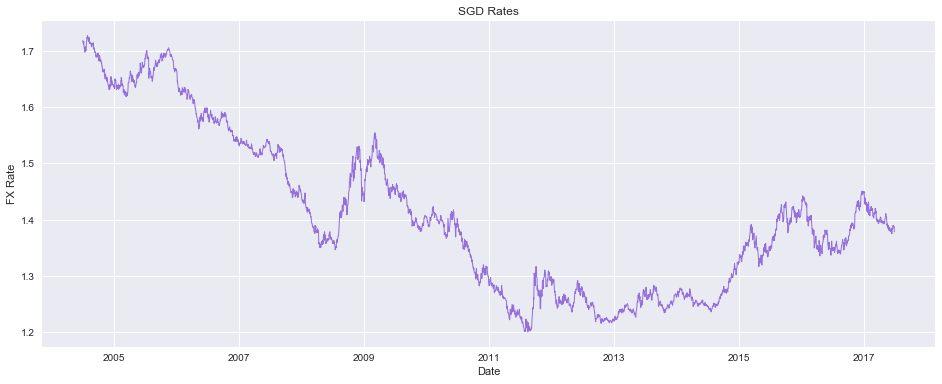

In [7]:
plt.figure(figsize=(16,6))
plt.plot(sgd_series.Date, sgd_series.Open, color='mediumpurple', linewidth=1, linestyle='-')
plt.title('SGD Rates')
plt.xlabel('Date')
plt.ylabel('FX Rate')
plt.savefig('SGDRates.png')
plt.show()

## Returns ##

We can use pandas to quickly compute returns and analyse the USDSGD exchange rates.

In [8]:
# 1 day relative returns
sgd_series['Returns1'] = sgd_series['High']/sgd_series['Low'].shift(1)-1
# 2 day relative returns
sgd_series['Returns2'] = sgd_series['High']/sgd_series['Low'].shift(2)-1
# 3 day relative returns
sgd_series['Returns3'] = sgd_series['High']/sgd_series['Low'].shift(3)-1

Let's check the maximum % change for each of the returns series

In [18]:
np.max(sgd_series['Returns1'])*100, np.max(sgd_series['Returns2'])*100, np.max(sgd_series['Returns3'])*100, 

(4.4197138314785445, 4.5110987349829212, 5.6118347001125723)

## Histograms ##

Now let's plot the histograms for the 3 return series to see how the distribution looks

We create a 'figure' of 3 subplots - ax1, ax2, ax3. The histograms for 1,2,3 day returns are plotted under ax1, ax2, ax3 respectively.

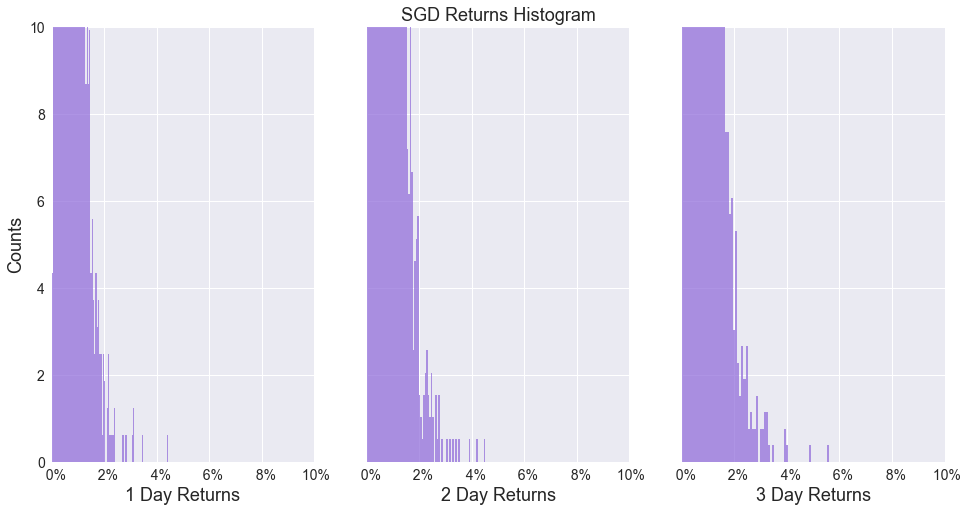

In [9]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,8))
ax2.set_title('SGD Returns Histogram', fontsize=18)
ax1.hist(sgd_series['Returns1'].dropna(), 100, normed=1, facecolor='mediumpurple', alpha=0.75)
ax1.axis([0,0.1,0,10])

ax2.hist(sgd_series['Returns2'].dropna(), 100, normed=1, facecolor='mediumpurple', alpha=0.75)
ax2.axis([0,0.1,0,10])

ax3.hist(sgd_series['Returns3'].dropna(), 100, normed=1, facecolor='mediumpurple', alpha=0.75)
ax3.axis([0,0.1,0,10])

ax1.set_ylabel('Counts', fontsize=18)
ax1.set_xlabel('1 Day Returns', fontsize=18)
ax2.set_xlabel('2 Day Returns', fontsize=18)
ax3.set_xlabel('3 Day Returns', fontsize=18)

xvals = ax1.get_xticks()
ax1.set_xticklabels('{:3.0f}%'.format(x*100) for x in xvals)

ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)
ax3.tick_params(axis='both', labelsize=14)

plt.savefig('SGDReturnsHist.png')
plt.show()

Check on start date

In [10]:
np.min(sgd_series.Date), np.max(sgd_series.Date)

(Timestamp('2004-07-01 00:00:00'), Timestamp('2017-06-30 00:00:00'))

## Line plots ##

The syntax here is the same as what we did for the histograms above, except that we are plotting line charts of the returns, and also add lines to indicate the max/min of each of the returns.

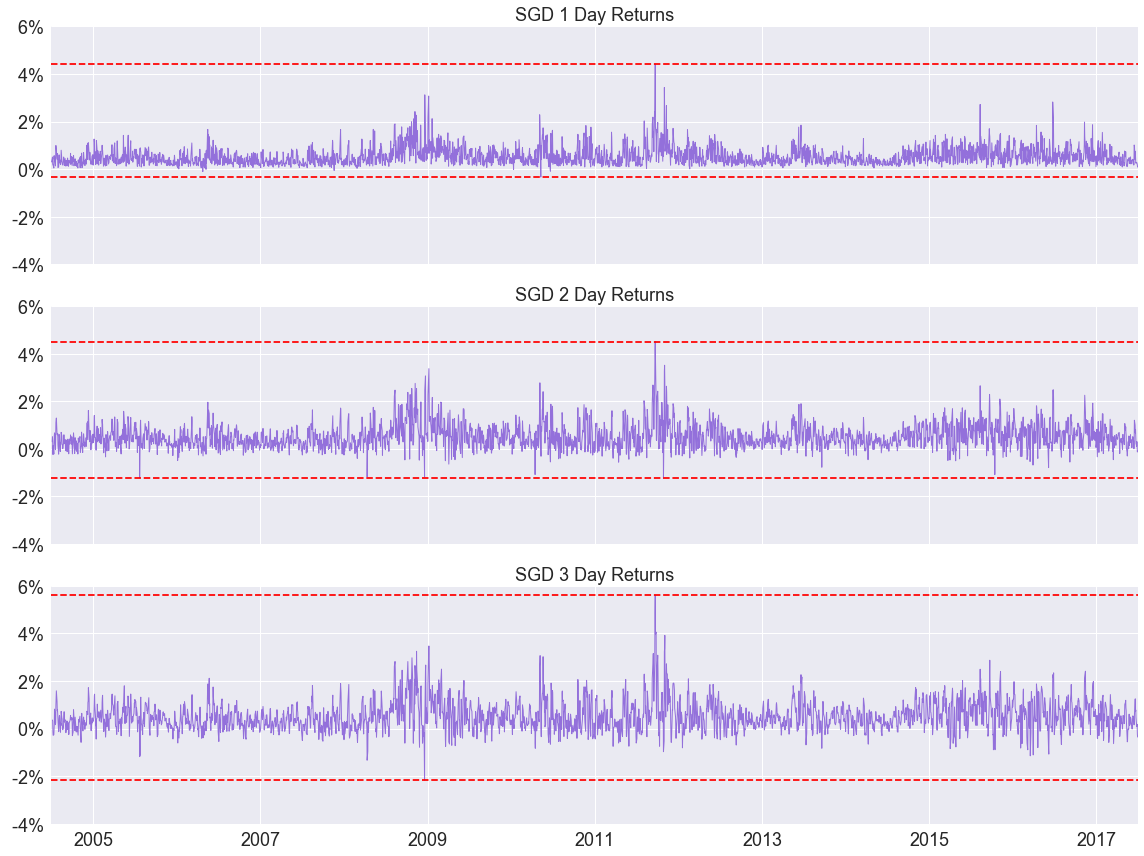

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, sharey=True, figsize=(16,12))

ax1.tick_params(axis='both', labelsize=18)
ax1.set_title('SGD 1 Day Returns', fontsize=18)
ax1.plot(sgd_series.Date, sgd_series.Returns1, color='mediumpurple', linewidth=1, linestyle='-')
ax1.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.max(sgd_series.Returns1),np.max(sgd_series.Returns1)], 'r--')
ax1.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.min(sgd_series.Returns1),np.min(sgd_series.Returns1)], 'r--')
ax1.axis([np.min(sgd_series.Date), np.max(sgd_series.Date), -0.04, 0.06])

ax2.tick_params(axis='both', labelsize=18)
ax2.set_title('SGD 2 Day Returns', fontsize=18)
ax2.plot(sgd_series.Date, sgd_series.Returns2, color='mediumpurple', linewidth=1, linestyle='-')
ax2.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.max(sgd_series.Returns2),np.max(sgd_series.Returns2)], 'r--')
ax2.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.min(sgd_series.Returns2),np.min(sgd_series.Returns2)], 'r--')
ax2.axis([np.min(sgd_series.Date), np.max(sgd_series.Date), -0.04, 0.06])

ax3.tick_params(axis='both', labelsize=18)
ax3.set_title('SGD 3 Day Returns', fontsize=18)
ax3.plot(sgd_series.Date, sgd_series.Returns3, color='mediumpurple', linewidth=1, linestyle='-')
ax3.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.max(sgd_series.Returns3),np.max(sgd_series.Returns3)], 'r--')
ax3.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.min(sgd_series.Returns3),np.min(sgd_series.Returns3)], 'r--')
ax3.axis([np.min(sgd_series.Date), np.max(sgd_series.Date), -0.04, 0.06])

yvals = ax3.get_yticks()
ax3.set_yticklabels('{:3.0f}%'.format(y*100) for y in yvals)

plt.tight_layout()
plt.savefig('SGDReturns_Timeseries.png')
plt.show()

## Rolling Volatilities ##

Computing rolling volatilities (i.e. volatilities over a specified rolling window) is quite common, and pandas makes it trivial. 

In [12]:
# Some NAs will be created when we compute returns, so we drop those first
sgd_series = sgd_series.dropna()
sgd_series.head()

,Date,Open,High,Low,Last,Ask High,Bid Low,Returns1,Returns2,Returns3
1559,2010-06-23,1.3856,1.3943,1.3835,1.3874,1.3955,1.3835,0.015070,0.018778,0.008608
1560,2010-06-24,1.3872,1.3948,1.3854,1.3918,1.3959,1.3854,0.008168,0.015434,0.019144
1561,2010-06-25,1.3930,1.3967,1.3849,1.3866,1.3980,1.3849,0.008156,0.009541,0.016817
1562,2010-06-28,1.3866,1.3887,1.3823,1.3855,1.3897,1.3823,0.002744,0.002382,0.003759
1563,2010-06-29,1.3866,1.4044,1.3845,1.4023,1.4056,1.3845,0.015988,0.014080,0.013714


In [13]:
sgd_series['Volatility252_1'] = pd.rolling_std(sgd_series['Returns1'], window=252)
sgd_series['Volatility252_2'] = pd.rolling_std(sgd_series['Returns2'], window=252)
sgd_series['Volatility252_3'] = pd.rolling_std(sgd_series['Returns3'], window=252)

sgd_series['Volatility6M_1'] = pd.rolling_std(sgd_series['Returns1'], window=126)
sgd_series['Volatility6M_2'] = pd.rolling_std(sgd_series['Returns2'], window=126)
sgd_series['Volatility6M_3'] = pd.rolling_std(sgd_series['Returns3'], window=126)

sgd_series['Volatility3M_1'] = pd.rolling_std(sgd_series['Returns1'], window=63)
sgd_series['Volatility3M_2'] = pd.rolling_std(sgd_series['Returns2'], window=63)
sgd_series['Volatility3M_3'] = pd.rolling_std(sgd_series['Returns3'], window=63)

sgd_series['Volatility1M_1'] = pd.rolling_std(sgd_series['Returns1'], window=31)
sgd_series['Volatility1M_2'] = pd.rolling_std(sgd_series['Returns2'], window=31)
sgd_series['Volatility1M_3'] = pd.rolling_std(sgd_series['Returns3'], window=31)

In [14]:
sgd_series = sgd_series.dropna()
sgd_series.head()

,Date,Open,High,Low,Last,Ask High,Bid Low,Returns1,Returns2,Returns3,...,Volatility252_3,Volatility6M_1,Volatility6M_2,Volatility6M_3,Volatility3M_1,Volatility3M_2,Volatility3M_3,Volatility1M_1,Volatility1M_2,Volatility1M_3
1810,2011-06-09,1.2337,1.2342,1.2282,1.2302,1.2351,1.2282,0.006935,0.006853,0.006606,...,0.006122,0.003340,0.004873,0.005889,0.003877,0.005539,0.006604,0.003936,0.005852,0.007127
1811,2011-06-10,1.2296,1.2373,1.2272,1.2371,1.2382,1.2272,0.007409,0.009464,0.009382,...,0.006124,0.003267,0.004773,0.005866,0.003647,0.005406,0.006469,0.003839,0.005772,0.007046
1812,2011-06-13,1.2362,1.2389,1.2338,1.2357,1.2397,1.2338,0.009534,0.008712,0.010769,...,0.006066,0.003295,0.004731,0.005795,0.003527,0.005308,0.006421,0.003856,0.005689,0.006971
1813,2011-06-14,1.2355,1.2379,1.2282,1.2300,1.2389,1.2282,0.003323,0.008719,0.007898,...,0.006018,0.003254,0.004738,0.005698,0.003497,0.005124,0.006251,0.003837,0.005566,0.006721
1814,2011-06-15,1.2304,1.2391,1.2293,1.2378,1.2397,1.2293,0.008875,0.004296,0.009697,...,0.006028,0.003272,0.004732,0.005723,0.003523,0.005120,0.006246,0.003858,0.005586,0.006709


## Value at Risk ##

We also compute the paramteric Value at Risk, e.g. a 99% VAR is basically computed by multiplying the volatility by 2.33. Do note that this assumes a normal distribution. So it might not be right if the distribution has fat tails.

In [19]:
sgd_series['99Volatility252_1'] = sgd_series['Volatility252_1']*2.33
sgd_series['99Volatility252_2'] = sgd_series['Volatility252_2']*2.33
sgd_series['99Volatility252_3'] = sgd_series['Volatility252_3']*2.33

sgd_series['99Volatility6M_1'] = sgd_series['Volatility6M_1']*2.33
sgd_series['99Volatility6M_2'] = sgd_series['Volatility6M_2']*2.33
sgd_series['99Volatility6M_3'] = sgd_series['Volatility6M_3']*2.33

sgd_series['99Volatility3M_1'] = sgd_series['Volatility3M_1']*2.33
sgd_series['99Volatility3M_2'] = sgd_series['Volatility3M_2']*2.33
sgd_series['99Volatility3M_3'] = sgd_series['Volatility3M_3']*2.33

sgd_series['99Volatility1M_1'] = sgd_series['Volatility1M_1']*2.33
sgd_series['99Volatility1M_2'] = sgd_series['Volatility1M_2']*2.33
sgd_series['99Volatility1M_3'] = sgd_series['Volatility1M_3']*2.33

In [20]:
sgd_series['999Volatility252_1'] = sgd_series['Volatility252_1']*3.5
sgd_series['999Volatility252_2'] = sgd_series['Volatility252_2']*3.5
sgd_series['999Volatility252_3'] = sgd_series['Volatility252_3']*3.5

sgd_series['999Volatility6M_1'] = sgd_series['Volatility6M_1']*3.5
sgd_series['999Volatility6M_2'] = sgd_series['Volatility6M_2']*3.5
sgd_series['999Volatility6M_3'] = sgd_series['Volatility6M_3']*3.5

sgd_series['999Volatility3M_1'] = sgd_series['Volatility3M_1']*3.5
sgd_series['999Volatility3M_2'] = sgd_series['Volatility3M_2']*3.5
sgd_series['999Volatility3M_3'] = sgd_series['Volatility3M_3']*3.5

sgd_series['999Volatility1M_1'] = sgd_series['Volatility1M_1']*3.5
sgd_series['999Volatility1M_2'] = sgd_series['Volatility1M_2']*3.5
sgd_series['999Volatility1M_3'] = sgd_series['Volatility1M_3']*3.5

In [21]:
sgd_series = sgd_series.dropna()
sgd_series.head()

,Date,Open,High,Low,Last,Ask High,Bid Low,Returns1,Returns2,Returns3,...,999Volatility252_3,999Volatility6M_1,999Volatility6M_2,999Volatility6M_3,999Volatility3M_1,999Volatility3M_2,999Volatility3M_3,999Volatility1M_1,999Volatility1M_2,999Volatility1M_3
1810,2011-06-09,1.2337,1.2342,1.2282,1.2302,1.2351,1.2282,0.006935,0.006853,0.006606,...,0.021426,0.011690,0.017057,0.020611,0.013568,0.019385,0.023115,0.013776,0.020483,0.024944
1811,2011-06-10,1.2296,1.2373,1.2272,1.2371,1.2382,1.2272,0.007409,0.009464,0.009382,...,0.021434,0.011436,0.016707,0.020532,0.012764,0.018921,0.022641,0.013437,0.020200,0.024659
1812,2011-06-13,1.2362,1.2389,1.2338,1.2357,1.2397,1.2338,0.009534,0.008712,0.010769,...,0.021231,0.011533,0.016560,0.020284,0.012345,0.018579,0.022475,0.013498,0.019913,0.024398
1813,2011-06-14,1.2355,1.2379,1.2282,1.2300,1.2389,1.2282,0.003323,0.008719,0.007898,...,0.021065,0.011389,0.016582,0.019942,0.012239,0.017934,0.021878,0.013430,0.019480,0.023523
1814,2011-06-15,1.2304,1.2391,1.2293,1.2378,1.2397,1.2293,0.008875,0.004296,0.009697,...,0.021098,0.011452,0.016562,0.020030,0.012331,0.017921,0.021860,0.013504,0.019550,0.023482


In [22]:
start = np.min(sgd_series.Date)
end = np.max(sgd_series.Date)
diff = pd.Timedelta(days=2000)
for i in pd.date_range(start, end, freq='1D'):
    sgd_series.loc[sgd_series.Date==i,'Rolling9999_1']=np.nanpercentile(sgd_series.Returns1[sgd_series.Date<i], 99.99)
    sgd_series.loc[sgd_series.Date==i,'Rolling9999_2']=np.nanpercentile(sgd_series.Returns2[sgd_series.Date<i], 99.99)
    sgd_series.loc[sgd_series.Date==i,'Rolling9999_3']=np.nanpercentile(sgd_series.Returns3[sgd_series.Date<i], 99.99)

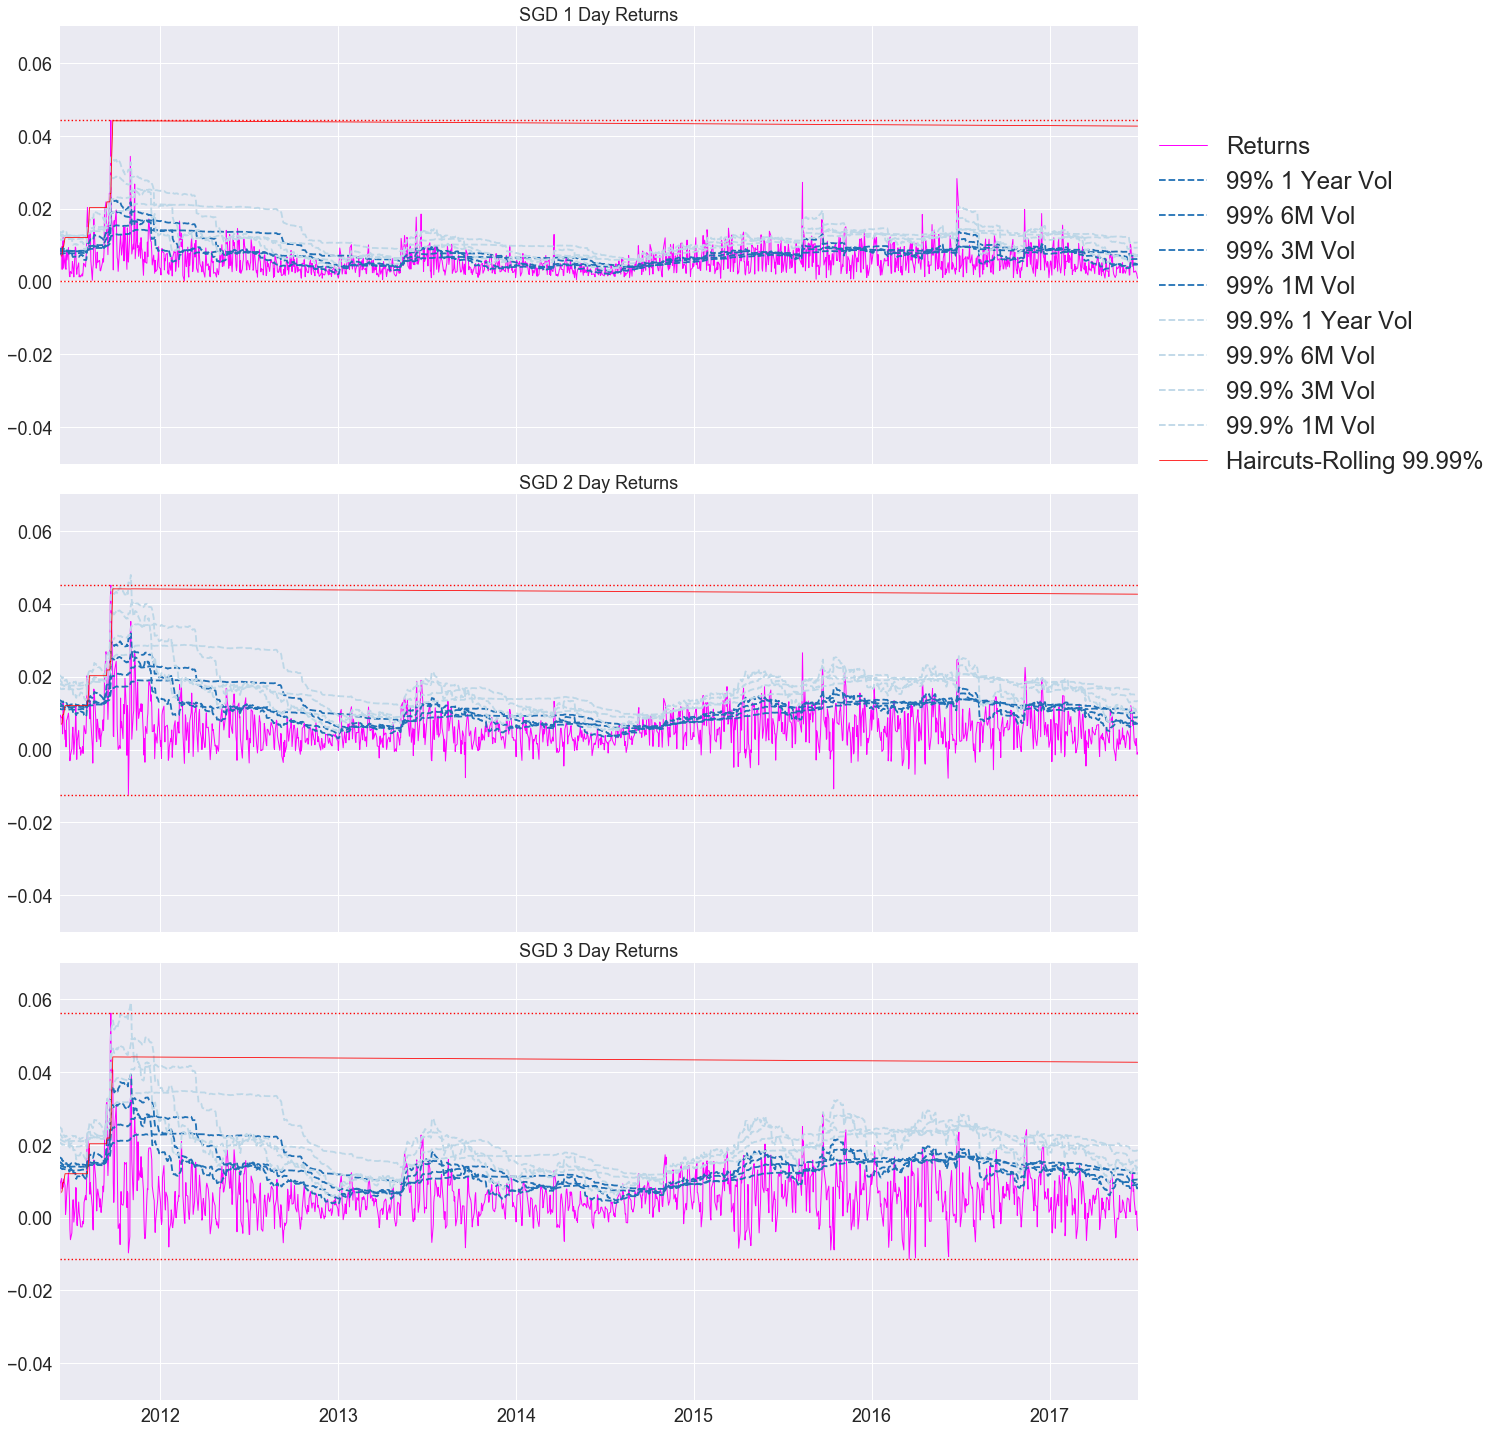

In [23]:
bkgrd = 'snow'
blues = ['#eff3ff','#bdd7e7','#6baed6','#2171b5'];

f, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,sharey=True, figsize=(16, 20))
# ax1.set_facecolor(bkgrd)

ax1.tick_params(axis='both', labelsize=18)
ax1.set_title('SGD 1 Day Returns', fontsize=18)
ax1.plot(sgd_series.Date, sgd_series.Returns1, color='fuchsia', linewidth=1, linestyle='-', label='Returns')
ax1.plot(sgd_series.Date, sgd_series['99Volatility252_1'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 1 Year Vol')
ax1.plot(sgd_series.Date, sgd_series['99Volatility6M_1'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 6M Vol')
ax1.plot(sgd_series.Date, sgd_series['99Volatility3M_1'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 3M Vol')
ax1.plot(sgd_series.Date, sgd_series['99Volatility1M_1'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 1M Vol')

ax1.plot(sgd_series.Date, sgd_series['999Volatility252_1'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1 Year Vol')
ax1.plot(sgd_series.Date, sgd_series['999Volatility6M_1'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 6M Vol')
ax1.plot(sgd_series.Date, sgd_series['999Volatility3M_1'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 3M Vol')
ax1.plot(sgd_series.Date, sgd_series['999Volatility1M_1'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1M Vol')

ax1.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.max(sgd_series.Returns1),np.max(sgd_series.Returns1)], color='red', linewidth=1.4, linestyle=':')
ax1.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.min(sgd_series.Returns1),np.min(sgd_series.Returns1)], color='red', linewidth=1.4, linestyle=':')
ax1.plot(sgd_series.Date, sgd_series['Rolling9999_1'].shift(1), color='red', linewidth=0.8, linestyle='-', label='Haircuts-Rolling 99.99%')
ax1.axis([np.min(sgd_series.Date), np.max(sgd_series.Date), -0.05, 0.07])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.65, box.height])
ax1.legend(loc='upper left', bbox_to_anchor=(1, 0.8), fontsize=24)


ax2.tick_params(axis='both', labelsize=18)
ax2.set_title('SGD 2 Day Returns', fontsize=18)
ax2.plot(sgd_series.Date, sgd_series.Returns2, color='fuchsia', linewidth=1, linestyle='-', label='Returns')
ax2.plot(sgd_series.Date, sgd_series['99Volatility252_2'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 1 Year Vol')
ax2.plot(sgd_series.Date, sgd_series['99Volatility6M_2'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 6M Vol')
ax2.plot(sgd_series.Date, sgd_series['99Volatility3M_2'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 3M Vol')
ax2.plot(sgd_series.Date, sgd_series['99Volatility1M_2'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 1M Vol')

ax2.plot(sgd_series.Date, sgd_series['999Volatility252_2'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1 Year Vol')
ax2.plot(sgd_series.Date, sgd_series['999Volatility6M_2'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 6M Vol')
ax2.plot(sgd_series.Date, sgd_series['999Volatility3M_2'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 3M Vol')
ax2.plot(sgd_series.Date, sgd_series['999Volatility1M_2'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1M Vol')

ax2.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.max(sgd_series.Returns2),np.max(sgd_series.Returns2)], color='red', linewidth=1.4, linestyle=':')
ax2.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.min(sgd_series.Returns2),np.min(sgd_series.Returns2)], color='red', linewidth=1.4, linestyle=':')
ax2.plot(sgd_series.Date, sgd_series['Rolling9999_1'].shift(1), color='red', linewidth=0.8, linestyle='-', label='Haircuts-Rolling 99.99%')
ax2.axis([np.min(sgd_series.Date), np.max(sgd_series.Date), -0.05, 0.07])


ax3.tick_params(axis='both', labelsize=18)
ax3.set_title('SGD 3 Day Returns', fontsize=18)
ax3.plot(sgd_series.Date, sgd_series.Returns3, color='fuchsia', linewidth=1, linestyle='-', label='Returns')
ax3.plot(sgd_series.Date, sgd_series['99Volatility252_3'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 1 Year Vol')
ax3.plot(sgd_series.Date, sgd_series['99Volatility6M_3'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 6M Vol')
ax3.plot(sgd_series.Date, sgd_series['99Volatility3M_3'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 3M Vol')
ax3.plot(sgd_series.Date, sgd_series['99Volatility1M_3'], color=blues[3], linewidth=1.8, linestyle='--', label='99% 1M Vol')

ax3.plot(sgd_series.Date, sgd_series['999Volatility252_3'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1 Year Vol')
ax3.plot(sgd_series.Date, sgd_series['999Volatility6M_3'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 6M Vol')
ax3.plot(sgd_series.Date, sgd_series['999Volatility3M_3'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 3M Vol')
ax3.plot(sgd_series.Date, sgd_series['999Volatility1M_3'], color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1M Vol')

ax3.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.max(sgd_series.Returns3),np.max(sgd_series.Returns3)], color='red', linewidth=1.4, linestyle=':')
ax3.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.min(sgd_series.Returns3),np.min(sgd_series.Returns3)], color='red', linewidth=1.4, linestyle=':')
ax3.plot(sgd_series.Date, sgd_series['Rolling9999_1'].shift(1), color='red', linewidth=0.8, linestyle='-', label='Haircuts-Rolling 99.99%')
ax3.axis([np.min(sgd_series.Date), np.max(sgd_series.Date), -0.05, 0.07])

plt.tight_layout()
plt.savefig('SGDAnalysis.png', bbox_inches='tight')
plt.show()

In [24]:
min_time = pd.Timestamp('2011/7/1')
max_time = pd.Timestamp('2012/1/1')

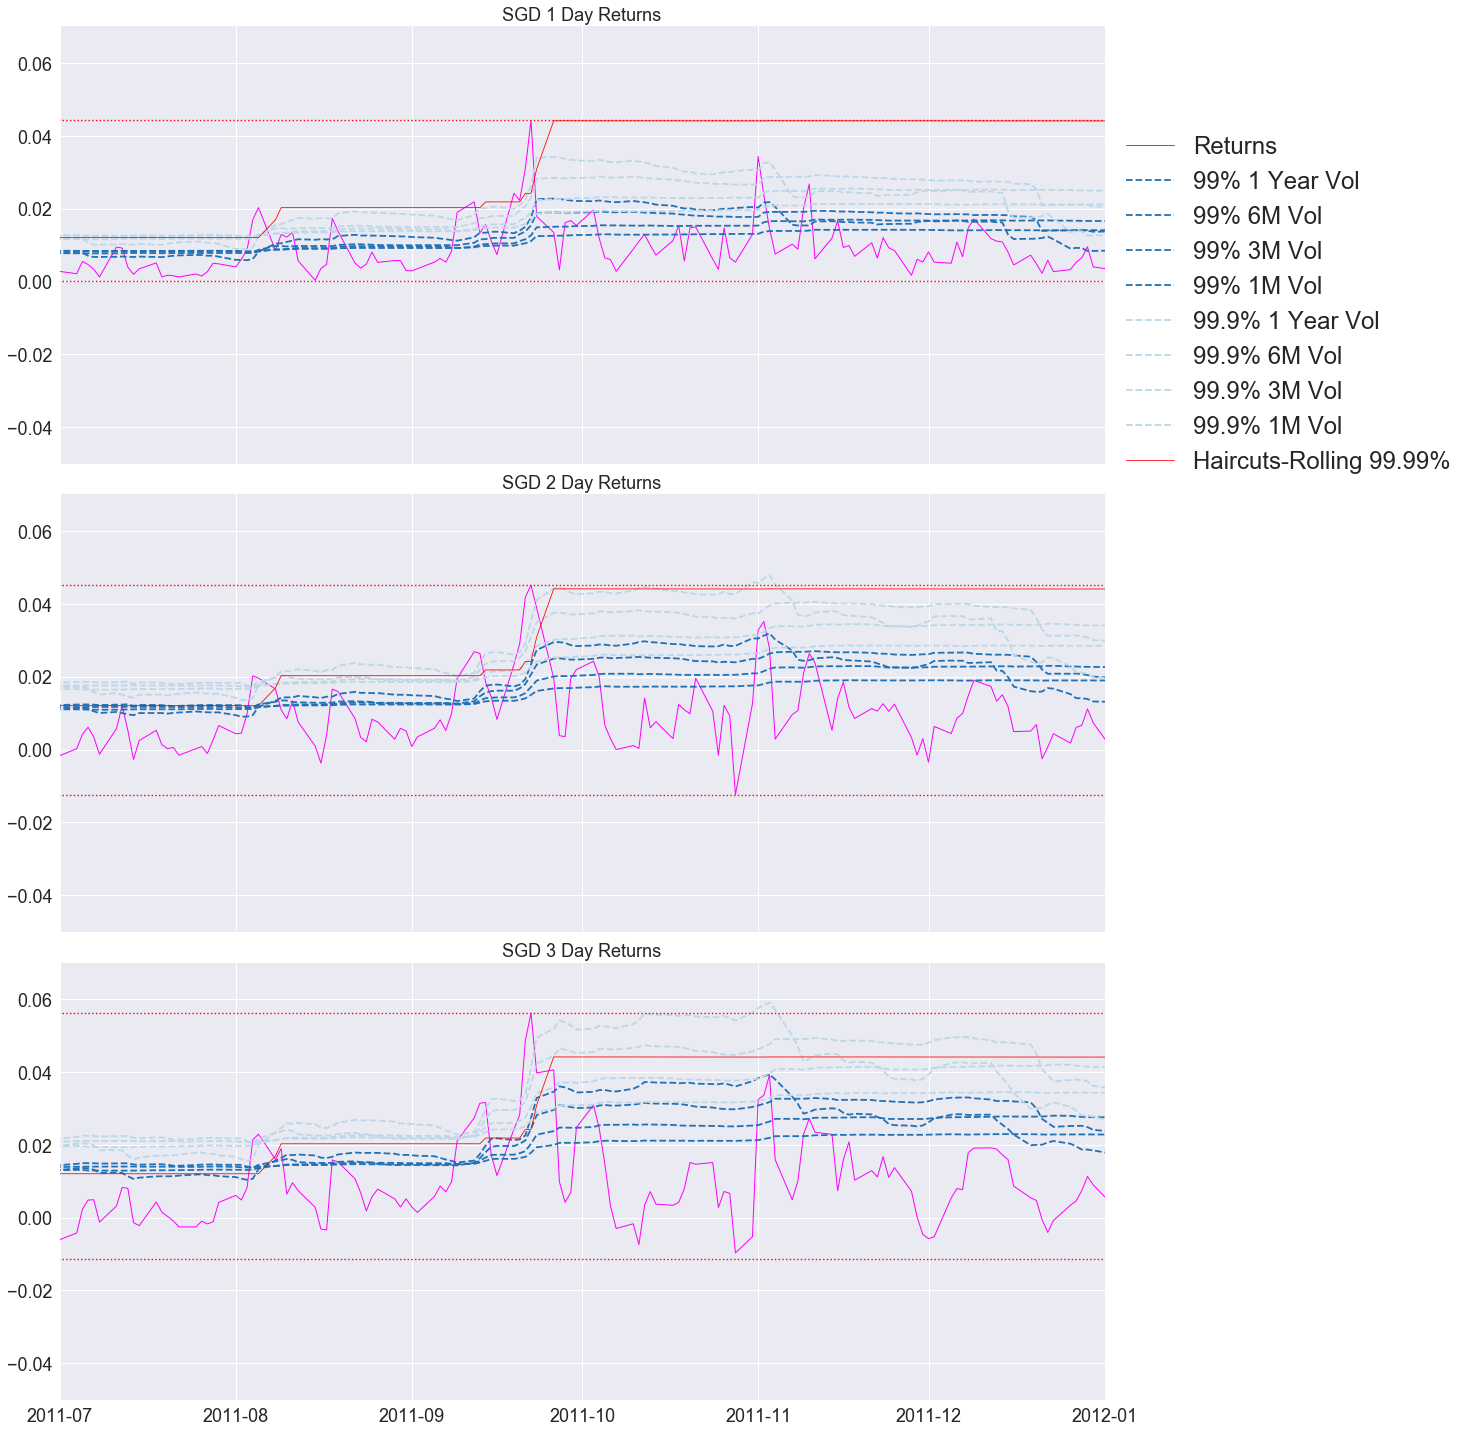

In [25]:
bkgrd = 'snow'
blues = ['#eff3ff','#bdd7e7','#6baed6','#2171b5'];

f, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,sharey=True, figsize=(16, 20))
# ax1.set_facecolor(bkgrd)

ax1.tick_params(axis='both', labelsize=18)
ax1.set_title('SGD 1 Day Returns', fontsize=18)
ax1.plot(sgd_series.Date, sgd_series.Returns1, color='fuchsia', linewidth=1, linestyle='-', label='Returns')
ax1.plot(sgd_series.Date, sgd_series['99Volatility252_1'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 1 Year Vol')
ax1.plot(sgd_series.Date, sgd_series['99Volatility6M_1'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 6M Vol')
ax1.plot(sgd_series.Date, sgd_series['99Volatility3M_1'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 3M Vol')
ax1.plot(sgd_series.Date, sgd_series['99Volatility1M_1'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 1M Vol')

ax1.plot(sgd_series.Date, sgd_series['999Volatility252_1'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1 Year Vol')
ax1.plot(sgd_series.Date, sgd_series['999Volatility6M_1'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 6M Vol')
ax1.plot(sgd_series.Date, sgd_series['999Volatility3M_1'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 3M Vol')
ax1.plot(sgd_series.Date, sgd_series['999Volatility1M_1'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1M Vol')

ax1.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.max(sgd_series.Returns1),np.max(sgd_series.Returns1)], color='red', linewidth=1.4, linestyle=':')
ax1.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.min(sgd_series.Returns1),np.min(sgd_series.Returns1)], color='red', linewidth=1.4, linestyle=':')
ax1.plot(sgd_series.Date, sgd_series['Rolling9999_1'].shift(1), color='red', linewidth=0.8, linestyle='-', label='Haircuts-Rolling 99.99%')
# ax1.axis([np.min(sgd_series.Date), np.max(sgd_series.Date), -0.05, 0.07])
ax1.axis([min_time, max_time, -0.05, 0.07])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.65, box.height])
ax1.legend(loc='upper left', bbox_to_anchor=(1, 0.8), fontsize=24)


ax2.tick_params(axis='both', labelsize=18)
ax2.set_title('SGD 2 Day Returns', fontsize=18)
ax2.plot(sgd_series.Date, sgd_series.Returns2, color='fuchsia', linewidth=1, linestyle='-', label='Returns')
ax2.plot(sgd_series.Date, sgd_series['99Volatility252_2'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 1 Year Vol')
ax2.plot(sgd_series.Date, sgd_series['99Volatility6M_2'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 6M Vol')
ax2.plot(sgd_series.Date, sgd_series['99Volatility3M_2'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 3M Vol')
ax2.plot(sgd_series.Date, sgd_series['99Volatility1M_2'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 1M Vol')

ax2.plot(sgd_series.Date, sgd_series['999Volatility252_2'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1 Year Vol')
ax2.plot(sgd_series.Date, sgd_series['999Volatility6M_2'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 6M Vol')
ax2.plot(sgd_series.Date, sgd_series['999Volatility3M_2'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 3M Vol')
ax2.plot(sgd_series.Date, sgd_series['999Volatility1M_2'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1M Vol')

ax2.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.max(sgd_series.Returns2),np.max(sgd_series.Returns2)], color='red', linewidth=1.4, linestyle=':')
ax2.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.min(sgd_series.Returns2),np.min(sgd_series.Returns2)], color='red', linewidth=1.4, linestyle=':')
ax2.plot(sgd_series.Date, sgd_series['Rolling9999_1'].shift(1), color='red', linewidth=0.8, linestyle='-', label='Haircuts-Rolling 99.99%')
# ax2.axis([np.min(sgd_series.Date), np.max(sgd_series.Date), -0.05, 0.07])
ax2.axis([min_time, max_time, -0.05, 0.07])


ax3.tick_params(axis='both', labelsize=18)
ax3.set_title('SGD 3 Day Returns', fontsize=18)
ax3.plot(sgd_series.Date, sgd_series.Returns3, color='fuchsia', linewidth=1, linestyle='-', label='Returns')
ax3.plot(sgd_series.Date, sgd_series['99Volatility252_3'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 1 Year Vol')
ax3.plot(sgd_series.Date, sgd_series['99Volatility6M_3'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 6M Vol')
ax3.plot(sgd_series.Date, sgd_series['99Volatility3M_3'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 3M Vol')
ax3.plot(sgd_series.Date, sgd_series['99Volatility1M_3'].shift(1), color=blues[3], linewidth=1.8, linestyle='--', label='99% 1M Vol')

ax3.plot(sgd_series.Date, sgd_series['999Volatility252_3'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1 Year Vol')
ax3.plot(sgd_series.Date, sgd_series['999Volatility6M_3'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 6M Vol')
ax3.plot(sgd_series.Date, sgd_series['999Volatility3M_3'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 3M Vol')
ax3.plot(sgd_series.Date, sgd_series['999Volatility1M_3'].shift(1), color=blues[1], linewidth=1.8, linestyle='--', label='99.9% 1M Vol')

ax3.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.max(sgd_series.Returns3),np.max(sgd_series.Returns3)], color='red', linewidth=1.4, linestyle=':')
ax3.plot([np.min(sgd_series.Date), np.max(sgd_series.Date)],[np.min(sgd_series.Returns3),np.min(sgd_series.Returns3)], color='red', linewidth=1.4, linestyle=':')
ax3.plot(sgd_series.Date, sgd_series['Rolling9999_1'].shift(1), color='red', linewidth=0.8, linestyle='-', label='Haircuts-Rolling 99.99%')
# ax3.axis([np.min(sgd_series.Date), np.max(sgd_series.Date), -0.05, 0.07])
ax3.axis([min_time, max_time, -0.05, 0.07])

plt.tight_layout()
plt.savefig('SGDAnalysisZoomIn.png', bbox_inches='tight')
plt.show()